In [10]:
!pip install pandas
!pip install numpy
!pip install torchvision
!pip install scikit-learn
!pip install tensorflow
!pip install seaborn

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df_traindata = pd.read_csv("../data/train.csv")

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_traindata['sentiment'].tolist())

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df_traindata['text'].tolist())
sequences = tokenizer.texts_to_sequences(df_traindata['text'].tolist())
padded_sequences = pad_sequences(sequences, maxlen=15, padding='post', truncating='post')

train_texts, validation_texts, train_labels, validation_labels = train_test_split(
    padded_sequences.tolist(), 
    labels.tolist(), 
    test_size=0.2, 
    random_state=42
)
train_texts = np.array(train_texts)
train_labels = np.array(train_labels)
validation_texts = np.array(validation_texts)
validation_labels = np.array(validation_labels)

df_testdata = pd.read_csv("../data/test.csv")
label_encoder = LabelEncoder()
labels_test = label_encoder.fit_transform(df_testdata['sentiment'].tolist())

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df_testdata['text'].tolist())
sequences = tokenizer.texts_to_sequences(df_testdata['text'].tolist())
padded_sequences_test = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')


In [14]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_texts, train_labels, epochs=10, batch_size=32, validation_data=(validation_texts, validation_labels))

Epoch 1/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.7305 - loss: 0.5332 - val_accuracy: 0.7762 - val_loss: 0.4626
Epoch 2/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.7945 - loss: 0.4397 - val_accuracy: 0.7796 - val_loss: 0.4562
Epoch 3/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.8169 - loss: 0.4004 - val_accuracy: 0.7812 - val_loss: 0.4736
Epoch 4/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.8349 - loss: 0.3674 - val_accuracy: 0.7729 - val_loss: 0.4871
Epoch 5/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.8516 - loss: 0.3343 - val_accuracy: 0.7722 - val_loss: 0.5196
Epoch 6/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.8671 - loss: 0.3027 - val_accuracy: 0.7682 - val_loss: 0.5779
Epoch 7/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.8781 - loss: 0.2762 - val_accuracy: 0.7579 - val_loss: 0.6663
Epoch 8/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.8926 - loss: 0

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5412 - loss: 1.7798
Test Accuracy: 0.54
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

    negative       0.71      0.70      0.70     15109
    positive       0.78      0.79      0.79     20890

    accuracy                           0.75     35999
   macro avg       0.74      0.74      0.74     35999
weighted avg       0.75      0.75      0.75     35999



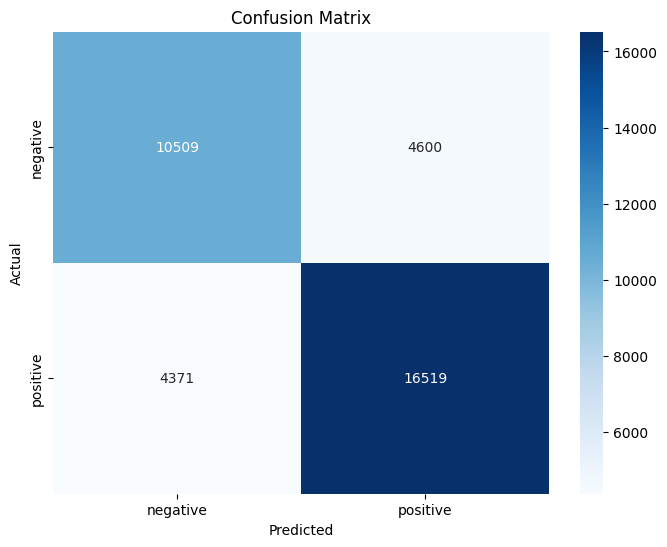

In [16]:
loss, accuracy = model.evaluate(padded_sequences_test, labels_test)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred = (model.predict(validation_texts) > 0.5).astype("int32")

print(classification_report(validation_labels, y_pred, target_names=['negative', 'positive']))

cm = confusion_matrix(validation_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()